In [403]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [404]:
def sigmoid(z):
    
    sigma=1/(1+np.exp(-z))
    return sigma

In [405]:
def cost_function(w,b,x,y):
    
    m,n=x.shape
    cost=0.0
    for i in range(m):
        z = np.dot(x[i],w)+b
        g=sigmoid(z)
        cost=cost + (-y[i]*np.log(g)-(1-y[i])*np.log(1-g))
    cost=cost/m
    return cost
        

In [406]:
def gradient_descent(w,b,x,y,learning_rate):
    
    alpha = learning_rate
    m,n=x.shape
    dj_dw=np.zeros(n)
    dj_db=0.0
    for i in range(m):
        g = sigmoid(np.dot(x[i],w)+b)
        err = (g - y[i])
        for j in range(n):
            dj_dw[j] =dj_dw[j] + err*x[i,j]
        dj_db = dj_db + err
    dj_db=dj_db/m
    dj_dw=dj_dw/m
    w = w - alpha*dj_dw
    b = b - alpha*dj_db
    
    return w,b

In [407]:
'''OR GATE WITHOUT GRADIENT DESCENT'''
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y=np.array([0,1,1,1])
w = np.array([2,2])
b=-1
m,n=X.shape
y_pred_actual = np.zeros(m)
y_pred=np.zeros(m)
for i in range(m):
    z=np.dot(X[i],w)+b
    g=sigmoid(z)
    y_pred_actual[i]=g
    if g>=0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0
print(y_pred)
print(y_pred_actual)

[0. 1. 1. 1.]
[0.26894142 0.73105858 0.73105858 0.95257413]


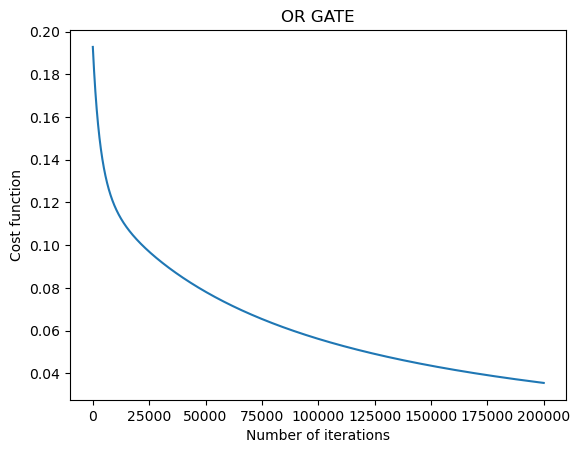

Final parameters: [5.94712126 5.94712126]
Final bias: -2.4871960040903667


In [408]:
'''OR GATE USING GRADIENT DESCENT''' 
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y=np.array([0,1,1,1])
w = np.array([3,3])
b=-2
J=[]
m,n=X.shape
y_pred_actual = np.zeros(m)
y_pred=np.zeros(m)
epochs=200000
learning_rate=0.001
for  j in range(epochs):
    w,b=gradient_descent(w,b,X,Y,learning_rate)
    binary_cross_entropy = cost_function(w,b,X,Y)
    J.append(binary_cross_entropy)
for i in range(m):
        z=np.dot(X[i],w) + b
        g_i = sigmoid(z)
        y_pred_actual[i] = g_i
        if g_i >= 0.5:
            y_pred[i]=1
        else:
            y_pred[i]=0 
    
plt.plot(J)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function')
plt.title('OR GATE')
plt.show()
print('Final parameters:',w)
print('Final bias:',b)
    

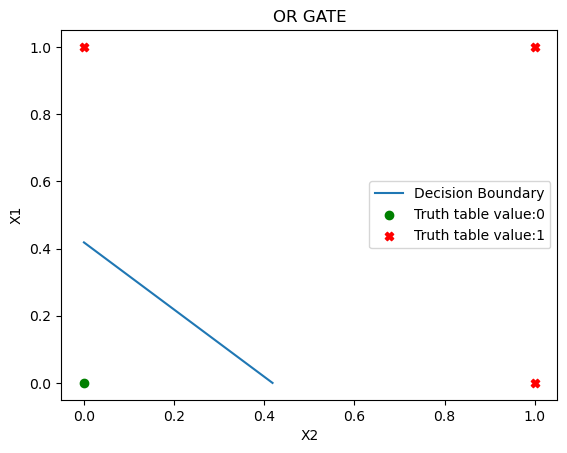

In [409]:
m,n=X.shape
x=(0,-b/w[1])
y=(-b/w[0],0)
plt.plot(x,y,label='Decision Boundary')
f=((X[i,0],X[i,1]) for i in range(m) if Y[i]==0)
xs,ys=zip(*f)
plt.scatter(xs,ys,color='green',marker='o',label='Truth table value:0')
e=((X[i,0],X[i,1]) for i in range(m) if Y[i]==1)
xs,ys=zip(*e)
plt.scatter(xs,ys,color='red',marker='X',label='Truth table value:1')
plt.xlabel("X2")
plt.ylabel("X1")
plt.title('OR GATE')
plt.legend()
plt.show()

In [410]:
p=X[:,0]
q=X[:,1]
outputdf = pd.DataFrame({'X1':p,'X2':q,'Y_TRUE':Y,'SIGMOID OUTPUT':y_pred_actual,'Y_PRED':y_pred})
outputdf

X1  X2  Y_TRUE  SIGMOID OUTPUT  Y_PRED
0   0   0       0        0.076761     0.0
1   0   1       1        0.969526     1.0
2   1   0       1        0.969526     1.0
3   1   1       1        0.999918     1.0

In [411]:
'''AND GATE WITHOUT GRADIENT DESCENT'''
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y=np.array([0,0,0,1])
w = np.array([2,2])
b=-3
m,n=X.shape
y_pred_actual = np.zeros(m)
y_pred=np.zeros(m)
for i in range(m):
    z=np.dot(X[i],w)+b
    g=sigmoid(z)
    y_pred_actual[i]=g
    if g>=0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0
print(y_pred)
print(y_pred_actual)

[0. 0. 0. 1.]
[0.04742587 0.26894142 0.26894142 0.73105858]


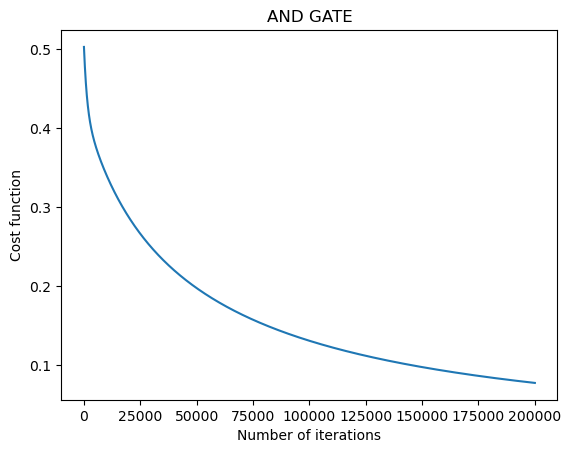

Final parameters: [4.35547075 4.35547075]
Final bias: -6.72363310072608


In [412]:
'''AND GATE USING GRADIENT DESCENT''' 
m,n=X.shape
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y=np.array([0,0,0,1])
w = np.array([1,1])
b=-1
J=[]
y_pred_actual = np.zeros(m)
y_pred=np.zeros(m)
epochs=200000
learning_rate=0.001
for  j in range(epochs):
    w,b=gradient_descent(w,b,X,Y,learning_rate)
    binary_cross_entropy = cost_function(w,b,X,Y)
    J.append(binary_cross_entropy)
for i in range(m):
        z=np.dot(X[i],w) + b
        g_i = sigmoid(z)
        y_pred_actual[i] = g_i
        if g_i >= 0.5:
            y_pred[i]=1
        else:
            y_pred[i]=0 
    
plt.plot(J)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function')
plt.title('AND GATE')
plt.show()
print('Final parameters:',w)
print('Final bias:',b)
    

In [413]:
p=X[:,0]
q=X[:,1]
print('TRUTH TABLE FOR AND GATE')
outputdf = pd.DataFrame({'X1':p,'X2':q,'Y_TRUE':Y,'SIGMOID OUTPUT':y_pred_actual,'Y_PRED':y_pred})
outputdf

TRUTH TABLE FOR AND GATE


X1  X2  Y_TRUE  SIGMOID OUTPUT  Y_PRED
0   0   0       0        0.001201     0.0
1   0   1       0        0.085633     0.0
2   1   0       0        0.085633     0.0
3   1   1       1        0.879458     1.0

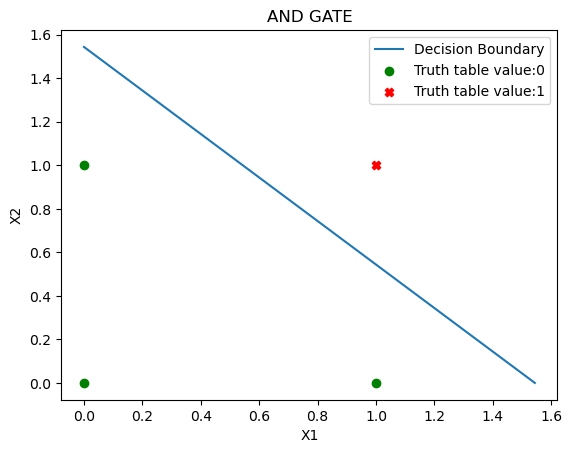

In [414]:
m,n=X.shape
x=(0,-b/w[1])
y=(-b/w[0],0)
plt.plot(x,y,label='Decision Boundary')
f=((X[i,0],X[i,1]) for i in range(m) if Y[i]==0)
xs,ys=zip(*f)
plt.scatter(xs,ys,color='green',marker='o',label='Truth table value:0')
e=((X[i,0],X[i,1]) for i in range(m) if Y[i]==1)
xs,ys=zip(*e)
plt.scatter(xs,ys,color='red',marker='X',label='Truth table value:1')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('AND GATE')
plt.legend()
plt.show()

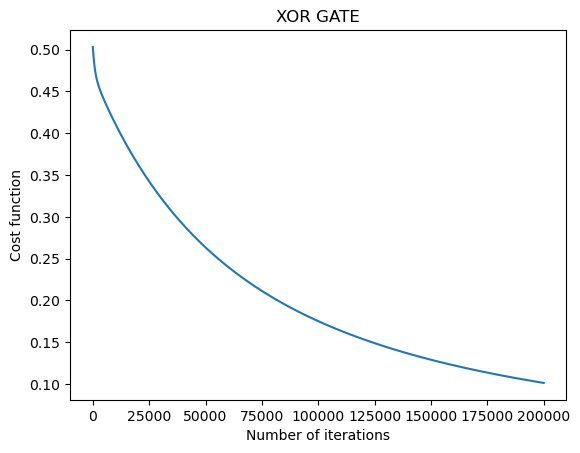

Final parameters: [ 4.20513949 -9.04435308]
Final bias: -1.9091408928854912


In [415]:
'''XOR GATE INTRODCING NEW FEATURES'''
X=np.array([[0,0],[1,0],[0,1],[1,1]])
x1=X[:,0]
x2=X[:,1]
x1x2=np.multiply(x1,x2)
x1x2=x1x2.reshape(-1,1)
xsum=np.sum((x1,x2),axis=0)
xsum=xsum.reshape(-1,1)
Xnew=np.concatenate((xsum,x1x2),axis=1)
Ynew=np.array([0,1,1,0])
w = np.array([1,-2])
b=0
J=[]
m,n = Xnew.shape
y_pred_actual = np.zeros(m)
y_pred=np.zeros(m)
epochs=200000
learning_rate=0.001
for  j in range(epochs):
    w,b=gradient_descent(w,b,Xnew,Ynew,learning_rate)
    binary_cross_entropy = cost_function(w,b,Xnew,Ynew)
    J.append(binary_cross_entropy)
for i in range(m):
        z=np.dot(Xnew[i],w) + b
        g_i = sigmoid(z)
        y_pred_actual[i] = g_i
        if g_i >= 0.5:
            y_pred[i]=1
        else:
            y_pred[i]=0 
    
plt.plot(J)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function')
plt.title('XOR GATE')
plt.show()
print('Final parameters:',w)
print('Final bias:',b)
    


In [416]:
p=X[:,0]
q=X[:,1]
print('TRUTH TABLE FOR XOR GATE')
outputdf = pd.DataFrame({'X1':p,'X2':q,'Y_TRUE':Y,'SIGMOID OUTPUT':y_pred_actual,'Y_PRED':y_pred})
outputdf

TRUTH TABLE FOR XOR GATE


X1  X2  Y_TRUE  SIGMOID OUTPUT  Y_PRED
0   0   0       0        0.129077     0.0
1   1   0       0        0.908545     1.0
2   0   1       0        0.908545     1.0
3   1   1       1        0.072884     0.0

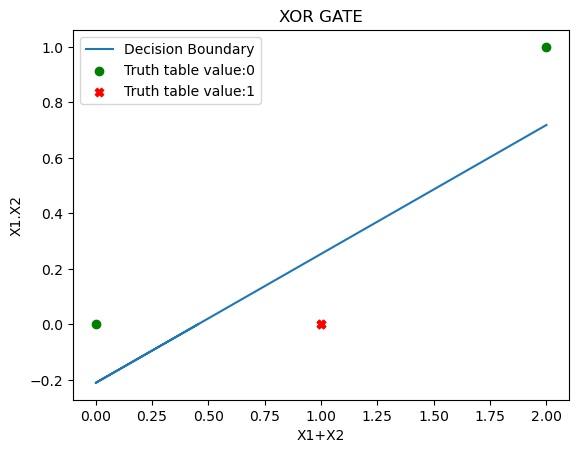

In [417]:
m,n=Xnew.shape
x=(-b/w[0],0)
y=(0,-b/w[1])
dx=x[0]-y[0]
dy=x[1]-y[1]
slope=dy/dx
k=slope*2-(b/w[1])
z=(2,k)
e=np.array([x,y,z])
xs,ys=zip(*e)
plt.plot(xs,ys,label='Decision Boundary')
f=((xsum[i],x1x2[i]) for i in range(m) if Ynew[i]==0)
xs,ys=zip(*f)
plt.scatter(xs,ys,color='green',marker='o',label='Truth table value:0')
e=((xsum[i],x1x2[i]) for i in range(m) if Ynew[i]==1)
xs,ys=zip(*e)
plt.scatter(xs,ys,color='red',marker='X',label='Truth table value:1')
plt.xlabel("X1+X2")
plt.ylabel("X1.X2")
plt.title('XOR GATE')
plt.legend()
plt.show()

# INFERENCES

AND and OR GATES can be linearly seperated using a decision boundary directly.So,we can use Logistic Regression directly and run gradient descent for specified epochs to reduce the cost value.Here, Binary Cross Entropy function can be employed as the cost function here as the problem is a binary classification problem.
In case of XOR Gate, linear seperation by a linear decision boundary is not possible.So,we have to use multiple layers or we have to transform linear input features into some non linear features.Here, I have used X1NEW=X1+X2 and X2NEW = X1.X2.In this case,we are transforming the data and then, we can find the required output and a linear decision boundary.